In [4]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

# Queueing simulation
## Exponential random draws

In [5]:
def exponential_rng(lam=1.0):  
    """ Generates exponential random number.
    
    Keywords:
        lam (float): the rate parameter, the inverse expectation of the distribution.
    
    Returns:
        exponential random number with given rate.
    """
    return -np.log(np.random.rand()) / lam

## Define events

In [6]:
######
#ADD YOUR CODE HERE.
######
class Event:
    """ Generic event.
    
    Attributes:
        time (float): Event time.
    """
    
    def __init__(self, time):
        self.time = time

    def __lt__(self, other):
        return self.time < other.time

class Generation(Event):
    """ Generation event.
    
    Attributes:
        time (float): Generation time.
    """
    
    def __init__(self, time):
        super().__init__(time)

class Arrival(Event):
    """ Arrival event.
    
    Attributes:
        time (float): Arrival time.
    """
    
    def __init__(self, time):
        super().__init__(time)

class Departure(Event):
    """ Departure event.
    
    Attributes:
        time (float): Departure time.
    """
    
    def __init__(self, time):
        super().__init__(time)

# class SimuStart(Event):
#     """ Simulation start event.
    
#     Attributes:
#         time (float): Simulation start time.
#     """
    
#     def __init__(self, time):
#         super().__init__(time)

class SimuEnd(Event):
    """ Simulation end event.
    
    Attributes:
        time (float): Simulation end time.
    """
    
    def __init__(self, time):
        super().__init__(time)



## Define scenario

In [7]:
class Scenario:
    """ Road scenario
    
    Attributes:
        demand duration (float): Duration of vehicle generation.
        t0 (float): Free-flow travel time.
        lam (float): Entry rate.
        mu (float): Service rate.
    """
    
    def __init__(self, 
                 demand_duration=50.0,
                 t0=1.0,
                 lam=1.0,
                 mu=1.0,
                ):
        self.demand_duration = demand_duration
        self.t0 = t0
        self.lam = lam
        self.mu = mu

## Define simulation procedure

In [13]:
def simulate(scenario: Scenario) -> Tuple[List[float], List[int]]:
    """ Implements the simulation procedure.
    
    Keywords:
        scenario (Scenario): Road scenario.
    
    Returns:
        times (list): Event times. 
        queues (list): Queue length over time. 
    """
    
    ######
    #ADD YOUR CODE HERE.
    ######

    
    times = []
    queues = []
    

    events: List[Event] = [
        Generation(0),
        SimuEnd(scenario.demand_duration),
    ]

    queue_count = 0
    while len(events) > 0:

        # sort events according to time
        events.sort()

        # current event and time
        current_event = events.pop(0)
        current_time = current_event.time
        
        # generate next event
        if isinstance(current_event, Generation):
            print('Generation')

            events.append(
                Arrival(current_time + scenario.t0 * np.random.rand())
            )

            time_nex_generation = current_time + exponential_rng(scenario.lam)
            if time_nex_generation < scenario.demand_duration:
                events.append(
                    Generation(time_nex_generation)
                )

        elif isinstance(current_event, Arrival):
            print('Arrival')

            times.append(current_time)
            queue_count += 1 
            queues.append(queue_count)

            if queue_count == 1:
                events.append(
                    Departure(current_time + exponential_rng(scenario.mu))
                )

        elif isinstance(current_event, Departure):
            print('Departure')
            
            times.append(current_time)
            queue_count -= 1
            queues.append(queue_count)
            
            if queue_count > 0:
                events.append(
                    Departure(current_time + exponential_rng(scenario.mu))
                )

        elif isinstance(current_event, SimuEnd):
            print("Simulation End")

        else:
            raise ValueError('Unknown event type.')
        
    return times, queues

## Run simulation

In [9]:
times, queues = simulate(Scenario())

Generation
Arrival
Generation
Arrival
Generation
Departure
Generation
Arrival
Arrival
Generation
Departure
Generation
Arrival
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Generation
Arrival
Generation
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Generation
Generation
Departure
Arrival
Arrival
Generation
Generation
Arrival
Departure
Generation
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Departure
Arrival
Departure
Departure
Departure
Departure
Generation
Departure
Departure
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arrival
Departure
Generation
Arrival
Generation
Arrival
Generation
Departure
Departure
Generation
Arrival
Arrival
Departure
Departure
Generation
Arrival
Departure
Generation
Arr

## Repeat the simulation multiple times

In [17]:
D = 3
times_queues = [simulate(Scenario()) for d in range(D)]

Generation
Arrival
Generation
Arrival
Generation
Generation
Arrival
Arrival
Departure
Generation
Arrival
Generation
Departure
Arrival
Generation
Arrival
Generation
Departure
Generation
Generation
Arrival
Arrival
Arrival
Generation
Arrival
Generation
Arrival
Departure
Departure
Departure
Generation
Departure
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Generation
Arrival
Departure
Departure
Departure
Departure
Generation
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Generation
Departure
Departure
Arrival
Generation
Arrival
Arrival
Departure
Generation
Arrival
Arrival
Generation
Arrival
Departure
Departure
Generation
Generation
Arrival
Arrival
Departure
Generation
Departure
Arrival
Departure
Departure
Departure
Departure
Departure
Generation
Generation
Arrival
Departure
Arrival
Departure
Generation
Arrival
Generation
Arrival
Departure
Generation
Departure
Arrival
Departure
Generation
Arrival
Generation
Generation
Arrival
Arrival
Generation
Depa

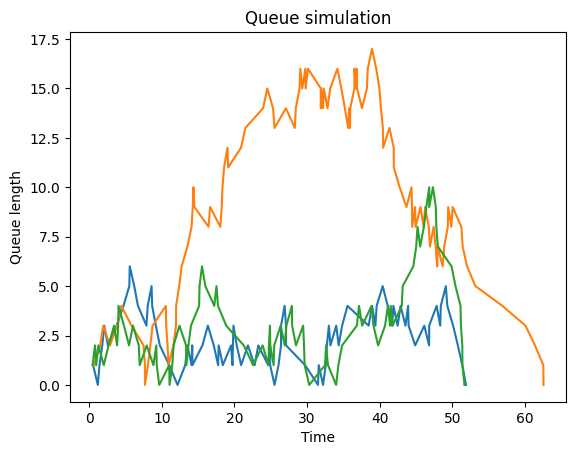

In [16]:
fig = plt.figure()
ax = plt.subplot(1,1,1)

for t, q in times_queues:
    ax.plot(t, q)
ax.set(title='Queue simulation',
       xlabel='Time',
       ylabel='Queue length')
fig.savefig('figure_queue_simulation.pdf', dpi=300)
plt.show()